<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [30]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import chi2_contingency


## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [2]:
file = "exam_scores.csv"
url = f"https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/{file}?raw=true"

if not os.path.exists(file):
    response = requests.get(url)

    if response.status_code == 200:
        with open(file, 'wb') as f:
            f.write(response.content)
        print(f"File '{file}' downloaded successfully.")
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")
else:
    print(f"File '{file}' already exists. Skipping download.")


File 'exam_scores.csv' already exists. Skipping download.


In [3]:
df = pd.read_csv(file)
df

,StudentID,Method,Score
0,1,A,79
1,2,A,77
2,3,A,82
3,4,A,75
4,5,A,80
5,6,A,78
6,7,A,83
7,8,A,76
8,9,A,81
9,10,A,74


Calculate the number of students in each teaching method.

In [4]:
# put your answer here
df.groupby("Method")["StudentID"].nunique()

Method
A    17
B    17
C    16
Name: StudentID, dtype: int64

Compute the mean and standard deviation of exam scores for each group.

In [15]:
# put your answer here
examMean = df.groupby("Method")["Score"].mean()
examMean

Method
A    78.588235
B    86.294118
C    71.937500
Name: Score, dtype: float64

In [17]:
examStd = df.groupby("Method")["Score"].std()
examStd

Method
A    2.575336
B    2.365500
C    1.768945
Name: Score, dtype: float64

Use a plot to show the exam scores by teaching method.

<Axes: title={'center': 'Exam Scores by Method'}, xlabel='Methods', ylabel='Scores'>

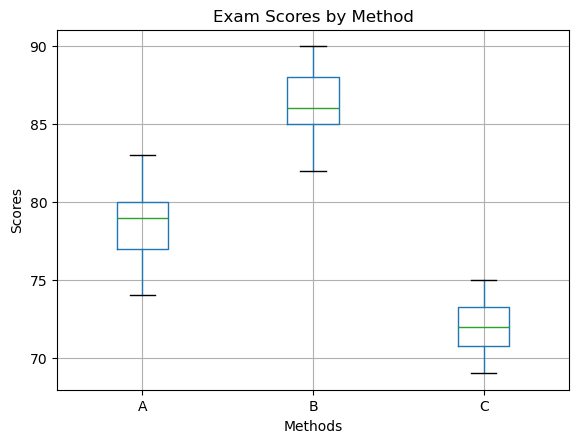

In [40]:
# put your answer here
scoreFig = df.boxplot(
    column="Score",
    by="Method",
    xlabel="Methods",
    ylabel="Scores",
)

scoreFig.get_figure().suptitle("")
scoreFig.set_title("Exam Scores by Method")
scoreFig

Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [ ]:
# put your answer here
anovaRes = stats.f_oneway(
    df[df["Method"] == "A"]["Score"],
    df[df["Method"] == "B"]["Score"],
    df[df["Method"] == "C"]["Score"],
)

stat = anovaRes.statistic
p = anovaRes.pvalue

print(f"ANOVA statistic: {stat}")
print(f"ANOVA p-value: {p}")

ANOVA statistic: 165.17845596593054
ANOVA p-value: 5.5032645988699085e-22


Interpret the results. What does it say about the relationship between teaching method and exam scores?

In [ ]:
# put your answer here

# Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there are significant
# differences in exam scores among the three methods. The very high F-Statistic value shows that the variance between the
# groups is much larger than the variance within the groups, suggesting that at least one method is significantly different
# from the others in terms of exam scores.

# The P-Value of 5.5032645988699085e-22 is extremely small, which provides strong evidence against the null hypothesis,
# confirming that the differences in exam scores among the methods are significant. It basically meant that it isn't likely
# a fluke that the observed differences in scores occurred by random chance, and that the method of instruction has a
# significant effect on the students' exam scores.

# We can safely say that the null hypothesis (H0) is rejected

alpha = 0.05

print("Reject H0: The differences in exam scores among the three methods are statistically significant." if p < alpha else "Fail to reject H0: The differences in exam scores among the three methods are not statistically significant.")

Reject H0: The differences in exam scores among the three methods are statistically significant.


## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [46]:
file = "litteringdata.csv"
url = f"https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/{file}?raw=true"

if not os.path.exists(file):
    response = requests.get(url)

    if response.status_code == 200:
        with open(file, 'wb') as f:
            f.write(response.content)
        print(f"File '{file}' downloaded successfully.")
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")
else:
    print(f"File '{file}' already exists. Skipping download.")

File 'litteringdata.csv' downloaded successfully.


In [50]:
df = pd.read_csv(url)
df.head()

,ID,Gender,Litter
0,1,Male,Yes
1,2,Male,Yes
2,3,Male,Yes
3,4,Male,Yes
4,5,Male,Yes


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      40 non-null     int64 
 1   Gender  40 non-null     object
 2   Litter  40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


Count the number of observations in each category for Gender and Litter separately.

In [55]:
# put your answer here
litterCount = df["Litter"].value_counts()
genderCount = df["Gender"].value_counts()

print(f"\n{litterCount}\n")
print(f"\n{genderCount}\n")


Litter
No     22
Yes    18
Name: count, dtype: int64


Gender
Male      20
Female    20
Name: count, dtype: int64



Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [62]:
# put your answer here
crossTab = pd.crosstab(
    df["Gender"],
    df["Litter"]
)

crossTab

Litter,No,Yes
Gender,,
Female,14,6
Male,8,12


State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

In [ ]:
# put your answer here

# (H0): Gender and littering behavior are independent
# (H1): Gender and littering behavior are dependent

Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [66]:
# put your answer here
chi, pVal, dof, expected = stats.chi2_contingency(
    crossTab
)

print(f"Chi-Square statistic: {chi}")
print(f"P-Value: {pVal}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

Chi-Square statistic: 2.525252525252525
P-Value: 0.11203684368556356
Degrees of Freedom: 1
Expected Frequencies:
[[11.  9.]
 [11.  9.]]


Interpret your results. Is there evidence that gender and littering behavior are associated?

In [ ]:
# put your answer here

# Given the results above, with a p-value greater than the 5% alpha level and low chi-square statistic, we fail to reject
# the null hypothesis. This means that there is not enough evidence to suggest a significant association between gender
# and littering behavior.

print("Fail to reject H0: There is no significant association between gender and littering behavior." if pVal > alpha else "Reject H0: There is a significant association between gender and litter behavior.")

Fail to reject H0: There is no significant association between gender and littering behavior.
